# Model 1

PLS model proposed by Anderson et al. (2020).

### References

Anderson, N., Walsh, K., Subedi, P., & Hayes, C. (2020). Achieving robustness across season, location and cultivar for a NIRS model for intact mango fruit dry matter content. Postharvest Biology and Technology, 168. https://doi.org/10.1016/j.postharvbio.2020.111202

## Setup

In [1]:
import pandas as pd
import pickle

from sklearn.cross_decomposition import PLSRegression

from utils import peval

In [2]:
# read in prepared dataset from previous step
df = pd.read_pickle("../../3_preprocessing/data/prepared/pretreatment_1_scaled_partition_1_outlier_flag_1.pkl")
x_cols = df.filter(regex="^\d+", axis=1).columns
descriptive_cols = [col for col in df.columns if col not in x_cols]
df

,partition,train_partition,sample_order_1,origin,population,date,season,region,cultivar,physio_stage,...,963_savgol_d2,966_savgol_d2,969_savgol_d2,972_savgol_d2,975_savgol_d2,978_savgol_d2,981_savgol_d2,984_savgol_d2,987_savgol_d2,990_savgol_d2
0,train,calibration,25670,published,100100,2015-09-27,2015,NT,caly,green,...,-0.002284,-0.002370,-0.002319,-0.002167,-0.001931,-0.001664,-0.001437,-0.001224,-0.001095,-0.001008
1,train,calibration,16789,published,100100,2015-09-27,2015,NT,caly,green,...,-0.002294,-0.002360,-0.002297,-0.002137,-0.001910,-0.001666,-0.001444,-0.001268,-0.001123,-0.001012
2,train,calibration,63678,published,100100,2015-09-27,2015,NT,caly,green,...,-0.002539,-0.002598,-0.002525,-0.002361,-0.002106,-0.001810,-0.001529,-0.001289,-0.001107,-0.000965
3,train,calibration,81577,published,100100,2015-09-27,2015,NT,caly,green,...,-0.002556,-0.002625,-0.002556,-0.002374,-0.002111,-0.001816,-0.001539,-0.001298,-0.001104,-0.000962
4,train,tunning,5762,published,100100,2015-09-27,2015,NT,caly,green,...,-0.002185,-0.002249,-0.002183,-0.002017,-0.001790,-0.001559,-0.001321,-0.001120,-0.000987,-0.000940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,test,,6265,marcelo,200800,NaT,2021,QLD,keitt,green,...,-0.001942,-0.002023,-0.002006,-0.001882,-0.001695,-0.001485,-0.001276,-0.001108,-0.000975,-0.000870
88449,test,,54886,marcelo,200800,NaT,2021,QLD,keitt,green,...,-0.001918,-0.002001,-0.001977,-0.001857,-0.001673,-0.001459,-0.001253,-0.001081,-0.000956,-0.000862
88450,test,,76820,marcelo,200800,NaT,2021,QLD,keitt,green,...,-0.001908,-0.002009,-0.001995,-0.001893,-0.001723,-0.001529,-0.001336,-0.001169,-0.001036,-0.000922
88451,test,,860,marcelo,200800,NaT,2021,QLD,keitt,green,...,-0.002194,-0.002312,-0.002301,-0.002184,-0.001977,-0.001731,-0.001494,-0.001303,-0.001150,-0.001023


## Build Model

In [3]:
# define the model variables
model = PLSRegression(
    n_components=11, 
    scale=False
)

# train the model
model.fit(
    X=df.query("partition == 'train'")[x_cols], 
    Y=df.query("partition == 'train'")["dry_matter"]
)

PLSRegression(n_components=11, scale=False)

## Test Model

In [4]:
df_preds = df[descriptive_cols].copy()
df_preds["y_true"] = df_preds["dry_matter"]
df_preds["y_pred"] = model.predict(df[x_cols])
df_preds

,partition,train_partition,sample_order_1,origin,population,date,season,region,cultivar,physio_stage,temp,reference_no,dry_matter,instrument,spectra_no,y_true,y_pred
0,train,calibration,25670,published,100100,2015-09-27,2015,NT,caly,green,high,1,12.402643,15006,1,12.402643,13.120476
1,train,calibration,16789,published,100100,2015-09-27,2015,NT,caly,green,high,1,12.402643,15006,2,12.402643,13.614745
2,train,calibration,63678,published,100100,2015-09-27,2015,NT,caly,green,low,1,12.402643,15006,3,12.402643,13.834281
3,train,calibration,81577,published,100100,2015-09-27,2015,NT,caly,green,low,1,12.402643,15006,4,12.402643,13.534999
4,train,tunning,5762,published,100100,2015-09-27,2015,NT,caly,green,high,2,12.430130,15006,29,12.430130,12.152968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,test,,6265,marcelo,200800,NaT,2021,QLD,keitt,green,undef,10676,22.502700,18007,93944,22.502700,19.426573
88449,test,,54886,marcelo,200800,NaT,2021,QLD,keitt,green,undef,10677,22.888390,18007,93945,22.888390,18.709567
88450,test,,76820,marcelo,200800,NaT,2021,QLD,keitt,green,undef,10678,22.975740,18007,93946,22.975740,22.351469
88451,test,,860,marcelo,200800,NaT,2021,QLD,keitt,green,undef,10679,23.211150,18007,93947,23.211150,21.004778


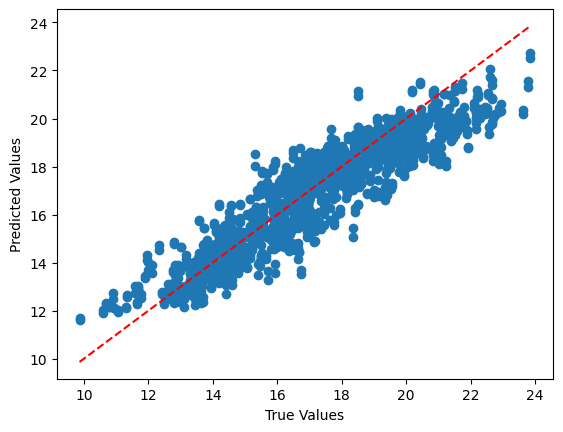

{'r2': 0.8299237990050742,
 'rmse': 1.1005359537798003,
 'sep': 1.066798799297777,
 'bias': 0.2718559548644475,
 'rpd': 2.5023609789880426}

In [5]:
test_partition = df_preds.query("partition == 'validation'")
metrics = peval.calculate_metrics(y_true=test_partition["y_true"], y_pred=test_partition["y_pred"])
metrics

## Output predictions and metrics

In [6]:
df_preds.to_pickle(f"data/predictions/model_4.pkl")
with open(f"data/metrics/model_4.pkl", "wb") as f:
    pickle.dump(metrics, f)